<a href="https://colab.research.google.com/github/VoLENguyen/FS_MNIST/blob/main/fshmnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow:{tf.__version__}\nKeras: {keras.__version__}")

Tensorflow:2.11.0
Keras: 2.11.0


1.Load data


In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [ ]:
type(x_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
class_name = ["T-Shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt",
              "Sneaker","Bag","Ankle boot"]

In [ ]:
class_name[y_train[0]]

'Ankle boot'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import  random as rd

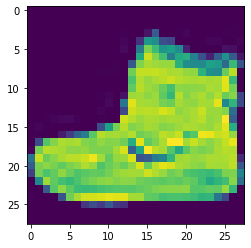

In [ ]:
plt.imshow(x_train[0])

Hàm

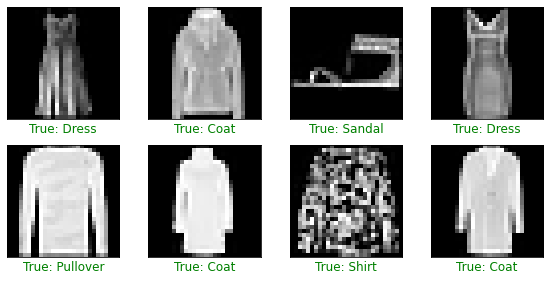

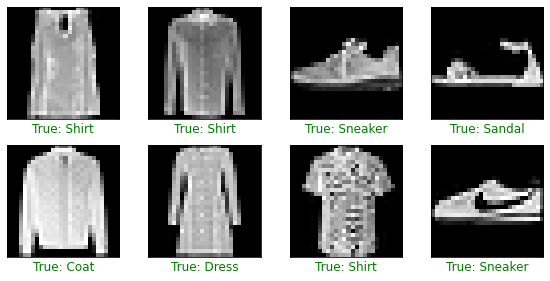

In [ ]:
def plot_data(x_data:np.ndarray,y_data : np.ndarray) -> None:
  nrows,ncols =  2,4
  fig,axes = plt.subplots(nrows,ncols,figsize = (8,4))
  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx// ncols,idx % ncols]
    
    img_idx = rd.randint(0,len_x)

    ax.imshow(x_data[img_idx],cmap = 'gray')
    ax.set(xticks = [],yticks = [])

    true_label_str = f"True: {class_name[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str,color = 'green',fontsize = 12)
  plt.tight_layout()
  plt.show()

plot_data(x_train,y_train)
plot_data(x_test,y_test)

# ***2.Xử lý hình ảnh***

In [ ]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255


In [ ]:
x_train.dtype
x_test.dtype

dtype('float32')

In [ ]:
x_train = np.expand_dims(x_train,axis = -1)
x_test = np.expand_dims(x_test,axis = -1)


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
class_num = len(class_name)
y_train_label = keras.utils.to_categorical(y_train,class_num)
y_test_label = keras.utils.to_categorical(y_test,class_num)

In [ ]:
y_train[0],y_test_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# **Build 1 mang  ANN**

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_shape = (28,28,1)

In [ ]:
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape), 
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(class_num,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
